# Project 2

### Exercise 1

## Part 1: Parameter determination
Assume that you are in the early days of the pandemic, so that you
do not have enough data to determine the parameters entering the SEIR
model. To overcome this lack on knowledge, you will use the parameters that
characterize the SARS which are reported
in Table 1 of
Chowell et al.
Specifically you will use:


* $N_0=10$ million;
* $\alpha=0.006/{\rm day}$;
* $\beta=0.75/{\rm day}$;
* $\gamma=(1/8)/{\rm day}$;
* $\epsilon=(1/3)/{\rm day}$.

Additionally, you will assume that the there is a balance between births and
natural deaths so that
$\Lambda=\mu N(t)$.
Furthermore, the initial conditions are

$$
S(0)= N_0-E(0) - I(0)
$$,

$$
E(0)= 20000
$$,
$$
I(0) = 1\
$$,
$$
R(0) = 0\
$$, .
These parameters imply an average disease incubation of 3 days and an infectious
period of 8 days.
The data correspond to no isolation conditions among individuals with high $\beta$
and a
basic reproductive factor $R_0=5.72 >1$.

In [383]:
import numpy as np 
import matplotlib.pyplot as plt




# parameter determination

N_0 = 1e7 # initial population
ALPHA = 0.006 # 1/day virus induced death rate
BETA = 0.75 # 1/day Probability of disease transmission per contact (dimensionless) times the number of contacts per unit time
GAMMA = 0.125 # 1/day Recovery rate of infectious individuals (the reciprocal is the infectious period)
EPSILON = 1/3. # 1/day Rate of progression from exposed to infectious (the reciprocal is the incubation period)
MU = 1/(83.*365.) # 1/day, Per-capita natural death rate, we multiplied by 365 to get go from 1/year to 1/day



E_0 = 20000 # initial exposed
I_0 = 1 # initial infected
R_0 = 0 # initial recovered
S_0 = N_0 - E_0 - I_0 # initial susceptible



## Part 2: Implementation of the SEIR model

Using the parameters from Part 1., write a code that solves the SEIR model up to t = 300
days.

* Plot S, E, I, R as a function of time. When is the peak of infected people reached? infected people? Considering that in the early days ∼ 5% of the individuals who tested positive for Covid-19 required admission to an intensive care unit, how many individuals will need an intensive care unit? Would this be sustainable? To answer this last question, consult this link with the total number of critical care beds per 100,000 inhabitants.

* Plot the total number of deaths vs time, and the number of dead individuals per day vs time. When is the peak of dead individuals per day reached?

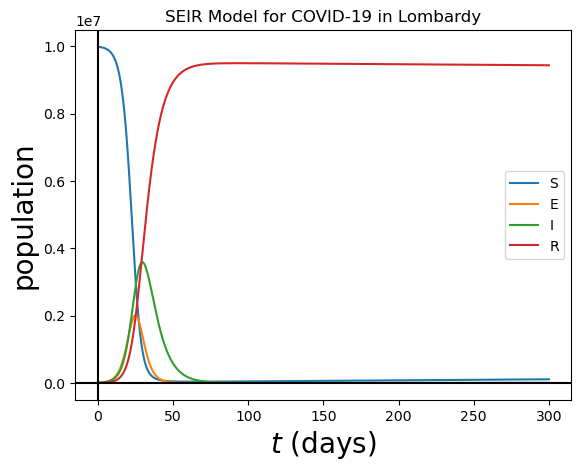

max infected 3585525.8464882327
day of max infected 29.552955295529554
assuming only infected test positive:
require icu max 179276.29232441165
number of icu beds 1250.0


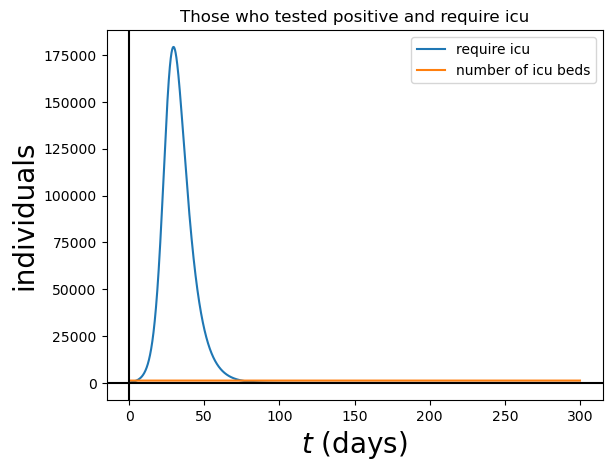

days where not enough beds [ 4. 75.]


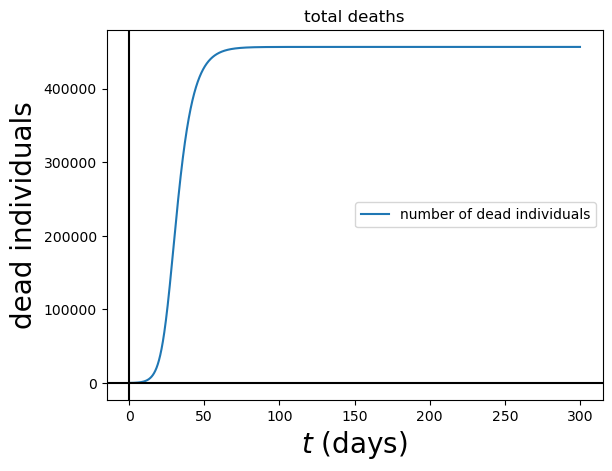

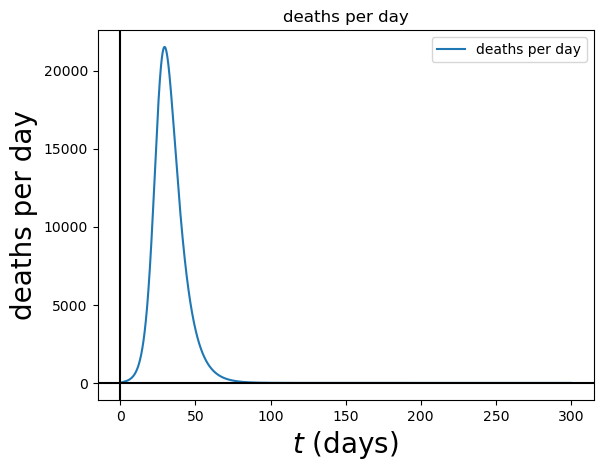

max deaths per day 21513.155078929383
day of max deaths per day 29.0


In [384]:
# pretty much from lecture 18 notes
def f(r):
    xs=r[0]
    xe=r[1]
    xi=r[2]
    xr=r[3] 
    xn=xs+xe+xi+xr
    fs= - BETA * xs * xi / xn - MU * xs + MU * xn
    fe=   BETA * xs * xi / xn - ( MU + EPSILON ) * xe
    fi=   EPSILON * xe - ( GAMMA + MU + ALPHA ) * xi
    fr=   GAMMA * xi - MU*xr
    return np.array([fs,fe,fi,fr],float)

nstep = 10000
days = 300
t = np.linspace(0,days,nstep)
dt = t[1]-t[0]

xs=np.zeros(nstep)
xe=np.zeros(nstep)
xi=np.zeros(nstep)
xr=np.zeros(nstep)

xfs =np.zeros(nstep)
xfe =np.zeros(nstep)
xfi =np.zeros(nstep)
xfr =np.zeros(nstep)

r = np.array([S_0,E_0,I_0,R_0],float)


for i in range(nstep):
        xs[i]=r[0]
        xe[i]=r[1]
        xi[i]=r[2]
        xr[i]=r[3]
        k1=dt*f(r)
        k2=dt*f(r+0.5*k1)    
        r+=k2

        xf=f(r)
        xfs[i]=xf[0]
        xfe[i]=xf[1]
        xfi[i]=xf[2]
        xfr[i]=xf[3]
    
xdn = N_0  - ( xs + xe + xi + xr )
    
plt.plot(t,xs,label="S")
plt.plot(t,xe,label="E")
plt.plot(t,xi,label="I")
plt.plot(t,xr,label="R")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend(loc="best")
plt.xlabel(r'$t$ (days)',fontsize=20) 
plt.ylabel(r'population',fontsize=20)
plt.title("SEIR Model for COVID-19 in Lombardy")
plt.show()

xd = - ( xfs + xfe + xfi + xfr )

max_infected = np.max(xi)
max_infected_day_idx = np.argmax(xi)
max_infected_day = t[max_infected_day_idx]
print("max infected", max_infected)
print("day of max infected", max_infected_day)
print("assuming only infected test positive:")

require_icu = 0.05*xi
require_icu_max = np.max(require_icu)
number_of_icu_beds = (12.5/100000)*N_0

print("require icu max", require_icu_max)
print("number of icu beds", number_of_icu_beds)

plt.plot(t, require_icu,label="require icu")
plt.plot(t, number_of_icu_beds*np.ones(nstep),label="number of icu beds")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend(loc="best")
plt.xlabel(r'$t$ (days)',fontsize=20)
plt.ylabel(r'individuals',fontsize=20)
plt.title("Those who tested positive and require icu")
plt.show()

days_where_not_enough_beds_idx = np.argwhere(require_icu>number_of_icu_beds)
days_where_not_enough_beds = np.floor([t[days_where_not_enough_beds_idx[0][0]], t[days_where_not_enough_beds_idx[-1][0]]])
print("days where not enough beds", days_where_not_enough_beds)


plt.plot(t, xdn,label="number of dead individuals")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend(loc="best")
plt.xlabel(r'$t$ (days)',fontsize=20) 
plt.ylabel(r'dead individuals',fontsize=20)
plt.title("total deaths")
plt.show()
plt.plot(t, xd,label="deaths per day")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend(loc="best")
plt.xlabel(r'$t$ (days)',fontsize=20) 
plt.ylabel(r'deaths per day',fontsize=20)
plt.title("deaths per day")
plt.show()

day_with_max_deaths_idx = np.argmax(xd)
day_with_max_deaths = t[day_with_max_deaths_idx]
max_deaths = np.max(xd)
print("max deaths per day", max_deaths)
print("day of max deaths per day", np.floor(day_with_max_deaths))




    

In [385]:
print(np.max(xdn))

456883.2531041708


clearly not stable as the number of beds is less than the number of people who need them by day 5, and it does not drop below that number until day 75.

## Part 3. Test of the model: changing β
In order to gain a deeper understanding of the model, you will vary the parameters of your
model starting from β.

* Keep all parameters constant, but for β (i.e., the probability of disease transmission per contact, times the number of contacts per unit time.) Decrease the value of β and study how this change affects the number of infected individuals.

* Plot in the same panel the number of infected individuals vs time for 1 < R0 ≤ 5.72.
* Plot in the same panel the number of infected individuals vs time for R0 < 1.

beta = 0.75
max infected 3585525.8464882327
day of max infected 29.552955295529554
$R_0$ at max infected 5.723181851975927


beta = 0.5
max infected 2730688.691671935
day of max infected 40.17401740174017
$R_0$ at max infected 3.8154545679839518


beta = 0.25
max infected 1006949.6703858258
day of max infected 81.60816081608161
$R_0$ at max infected 1.9077272839919759


beta = 0.1
max infected 12814.61205248253
day of max infected 7.020702070207021
$R_0$ at max infected 0.7630909135967904




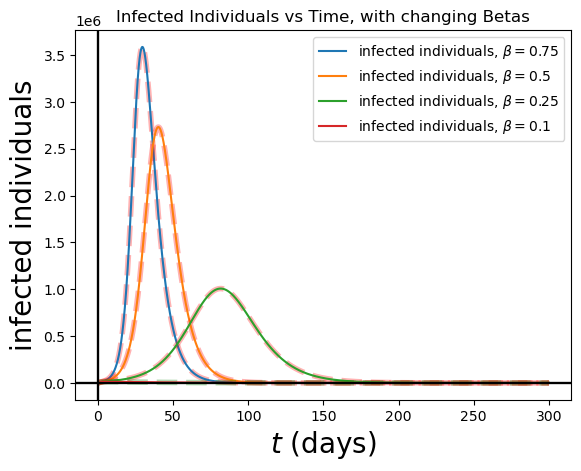

In [386]:
N_0 = 1e7 # initial population
ALPHA = 0.006 # 1/day virus induced death rate
GAMMA = 0.125 # 1/day Recovery rate of infectious individuals (the reciprocal is the infectious period)
EPSILON = 1/3. # 1/day Rate of progression from exposed to infectious (the reciprocal is the incubation period)
MU = 1/(83.*365.) # 1/day, Per-capita natural death rate, we multiplied by 365 to get go from 1/year to 1/day

E_0 = 20000 # initial exposed
I_0 = 1 # initial infected
R_0 = 0 # initial recovered
S_0 = N_0 - E_0 - I_0 # initial susceptible

def f(r,BETA):
    xs=r[0]
    xe=r[1]
    xi=r[2]
    xr=r[3] 
    xn=xs+xe+xi+xr
    fs= - BETA * xs * xi / xn - MU * xs + MU * xn
    fe=   BETA * xs * xi / xn - ( MU + EPSILON ) * xe
    fi=   EPSILON * xe - ( GAMMA + MU + ALPHA ) * xi
    fr=   GAMMA * xi - MU*xr
    return np.array([fs,fe,fi,fr],float)

BETAs = [0.75, 0.5, 0.25, 0.1]

for BETA in BETAs:
    N_0 = 1e7 # initial population
    ALPHA = 0.006 # 1/day virus induced death rate
    GAMMA = 0.125 # 1/day Recovery rate of infectious individuals (the reciprocal is the infectious period)
    EPSILON = 1/3. # 1/day Rate of progression from exposed to infectious (the reciprocal is the incubation period)
    MU = 1/(83.*365.) # 1/day, Per-capita natural death rate, we multiplied by 365 to get go from 1/year to 1/day

    E_0 = 20000 # initial exposed
    I_0 = 1 # initial infected
    R_0 = 0 # initial recovered
    S_0 = N_0 - E_0 - I_0 # initial susceptible
    R0 = (BETA*EPSILON)/((MU+EPSILON)*(GAMMA+MU+ALPHA))
    nstep = 10000
    days = 300
    t = np.linspace(0,days,nstep)
    dt = t[1]-t[0]

    xs=np.zeros(nstep)
    xe=np.zeros(nstep)
    xi=np.zeros(nstep)
    xr=np.zeros(nstep)

    xfs =np.zeros(nstep)
    xfe =np.zeros(nstep)
    xfi =np.zeros(nstep)
    xfr =np.zeros(nstep)


    r = np.array([S_0,E_0,I_0,R_0],float)


    for i in range(nstep):
            xs[i]=r[0]
            xe[i]=r[1]
            xi[i]=r[2]
            xr[i]=r[3]
            k1=dt*f(r,BETA)
            k2=dt*f(r+0.5*k1,BETA)    
            r+=k2

            xf=f(r,BETA)
            xfs[i]=xf[0]
            xfe[i]=xf[1]
            xfi[i]=xf[2]
            xfr[i]=xf[3]


    max_infected = np.max(xi)
    max_infected_day_idx = np.argmax(xi)
    max_infected_day = t[max_infected_day_idx]
    print("beta = " + str(BETA))
    print("max infected", max_infected)
    print("day of max infected", max_infected_day)
    print("$R_0$ at max infected", R0)
    print("\n")
    R0 = np.ones(nstep)*(BETA*EPSILON)/((MU+EPSILON)*(GAMMA+MU+ALPHA))
    plt.plot(t[np.logical_and(R0>1,R0<5.73)],xi[np.logical_and(R0>1,R0<5.73)],color="red",alpha = 0.3, linestyle = "dashed", linewidth=4)
    plt.plot(t[R0<1],xi[R0<1],color="green",alpha = 0.3, linestyle = "dashed", linewidth=4)
    plt.plot(t,xi,label=r"infected individuals, $\beta = $"+f'{BETA}')
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.legend(loc="best")
    plt.xlabel(r'$t$ (days)',fontsize=20)
    plt.ylabel(r'infected individuals',fontsize=20)
    plt.title("Infected Individuals vs Time, with changing Betas")
plt.show()



Text(0.5, 1.0, 'Infected Individuals vs Time, $\\beta = $=0.1')

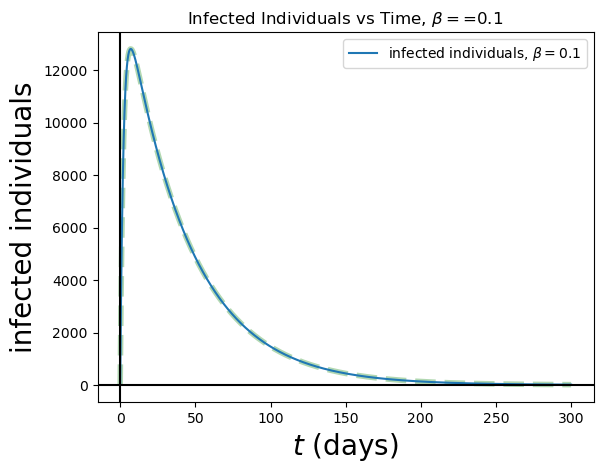

In [387]:
plt.plot(t[np.logical_and(R0>1,R0<5.73)],xi[np.logical_and(R0>1,R0<5.73)],color="red",alpha = 0.3, linestyle = "dashed", linewidth=4)
plt.plot(t[R0<1],xi[R0<1],color="green",alpha = 0.3, linestyle = "dashed", linewidth=4)
plt.plot(t,xi,label=r"infected individuals, $\beta = $"+f'{BETA}')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend(loc="best")
plt.xlabel(r'$t$ (days)',fontsize=20)
plt.ylabel(r'infected individuals',fontsize=20)
plt.title("Infected Individuals vs Time, "+ r"$\beta = $"+ f'={BETA}')



makes sense because as beta shrinks, $R_0$ shrinks as well. When it drops below one, that means that the number of people infected by one person is less than one, so the number of infected people will drop to zero much faster because it is being spread to less people than are currently infected. You can see the drastic difference in the plots, as the lines with red dashes lines indicate where $R_0$ is greater than one. These lines follow similar patterns. When $\beta$ decreases, the number of days it takes to reach the maximum increases, and the maximum itself decreases with beta. The print statements back this up.

Additionally, when beta is low enough, it is clearly visibile that the number of infected people follows a much different pattern. The maximum is significantly lower than it was before. This is because the number of people infected by one person is less than one, so the number of infected people will drop to zero much faster because it is being spread to less people than are currently infected.This graph has a right skew, as opposed to the others which look like a normal distribution curve (i know these are not PDF curves, but the shapes are similar). The maximum is reached much quicker and is much lower than what we would expect had the pattern of the other graphs held. This is because the number of people infected by one person is less than one, so the number of infected people will drop to zero much faster because it is being spread to less people than are currently infected.

This goes to show that a virus with a low $R_0$ poses much less of a threat than an equal virus with a higher $R_0$, because it cannot spread as much. And it also shows that changing $\beta$ can has a strong impact on $R_0$.

## Part 4: Test of the model: changing the initial condition for the Exposed individuals

Pick two values of R0, one bigger than one and the other smaller than one.

* Plot the number of infected individuals vs time for E(0) = 10k; 100k; and 1000k for R0 > 1. What happens to the peak of the infected individuals?

* Plot the number of infected individuals vs time for E(0) = 10k; 100k; and 1000k for
R0 < 1. What happens to the peak of the infected individuals?





R0 = 5.72
E_0 = 10000
beta = 0.7495830310754285
max infected 3583347.9348759656
day of max infected 32.073207320732074
$R_0$ at max infected 5.72


R0 = 5.72
E_0 = 100000
beta = 0.7495830310754285
max infected 3593660.3769042008
day of max infected 23.73237323732373
$R_0$ at max infected 5.72


R0 = 5.72
E_0 = 1000000
beta = 0.7495830310754285
max infected 3702196.0368208275
day of max infected 15.061506150615061
$R_0$ at max infected 5.72




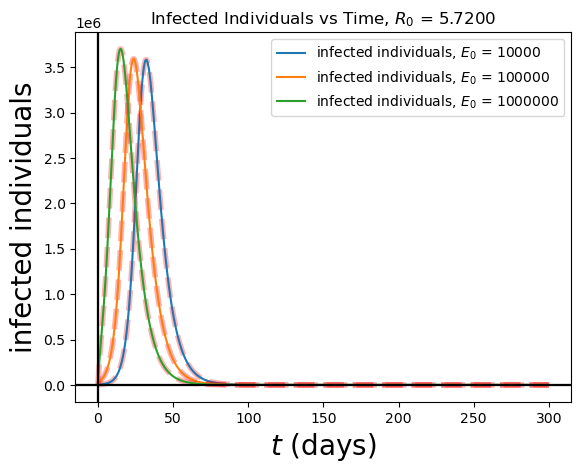

R0 = 0.1
E_0 = 10000
beta = 0.013104598445374625
max infected 5548.751596917084
day of max infected 4.77047704770477
$R_0$ at max infected 0.1


R0 = 0.1
E_0 = 100000
beta = 0.013104598445374625
max infected 55474.3839544725
day of max infected 4.77047704770477
$R_0$ at max infected 0.1


R0 = 0.1
E_0 = 1000000
beta = 0.013104598445374625
max infected 553926.0721854512
day of max infected 4.77047704770477
$R_0$ at max infected 0.1




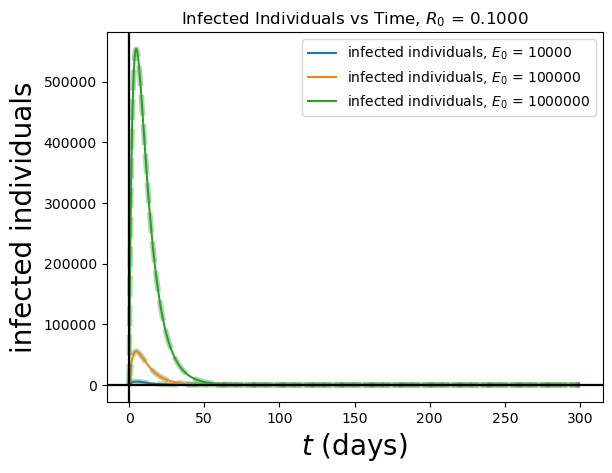

In [388]:
N_0 = 1e7 # initial population
ALPHA = 0.006 # 1/day virus induced death rate
BETA = 0.75 # 1/day Probability of disease transmission per contact (dimensionless) times the number of contacts per unit time
GAMMA = 0.125 # 1/day Recovery rate of infectious individuals (the reciprocal is the infectious period)
EPSILON = 1/3. # 1/day Rate of progression from exposed to infectious (the reciprocal is the incubation period)
MU = 1/(83.*365.) # 1/day, Per-capita natural death rate, we multiplied by 365 to get go from 1/year to 1/day

I_0 = 1 # initial infected
R_0 = 0 # initial recovered
S_0 = N_0 - E_0 - I_0 # initial susceptible

def f(r,BETA):
    xs=r[0]
    xe=r[1]
    xi=r[2]
    xr=r[3] 
    xn=xs+xe+xi+xr
    fs= - BETA * xs * xi / xn - MU * xs + MU * xn
    fe=   BETA * xs * xi / xn - ( MU + EPSILON ) * xe
    fi=   EPSILON * xe - ( GAMMA + MU + ALPHA ) * xi
    fr=   GAMMA * xi - MU*xr
    return np.array([fs,fe,fi,fr],float)

R0S = [5.72, 0.1]
E_0S = [10000,100000,1000000]

for R0 in R0S:
    for E_0 in E_0S:
        N_0 = 1e7 # initial population
        BETA = R0*((MU+EPSILON)*(GAMMA+MU+ALPHA))/EPSILON # 1/day Probability of disease transmission per contact (dimensionless) times the number of contacts per unit time
        ALPHA = 0.006 # 1/day virus induced death rate
        GAMMA = 0.125 # 1/day Recovery rate of infectious individuals (the reciprocal is the infectious period)
        EPSILON = 1/3. # 1/day Rate of progression from exposed to infectious (the reciprocal is the incubation period)
        MU = 1/(83.*365.) # 1/day, Per-capita natural death rate, we multiplied by 365 to get go from 1/year to 1/day

        E_0 = E_0 # initial exposed
        I_0 = 1 # initial infected
        R_0 = 0 # initial recovered
        S_0 = N_0 - E_0 - I_0 # initial susceptible
        R0 = (BETA*EPSILON)/((MU+EPSILON)*(GAMMA+MU+ALPHA))
        nstep = 10000
        days = 300
        t = np.linspace(0,days,nstep)
        dt = t[1]-t[0]

        xs=np.zeros(nstep)
        xe=np.zeros(nstep)
        xi=np.zeros(nstep)
        xr=np.zeros(nstep)

        xfs =np.zeros(nstep)
        xfe =np.zeros(nstep)
        xfi =np.zeros(nstep)
        xfr =np.zeros(nstep)

        r = np.array([S_0,E_0,I_0,R_0],float)


        for i in range(nstep):
                xs[i]=r[0]
                xe[i]=r[1]
                xi[i]=r[2]
                xr[i]=r[3]
                k1=dt*f(r,BETA)
                k2=dt*f(r+0.5*k1,BETA)    
                r+=k2

                xf=f(r,BETA)
                xfs[i]=xf[0]
                xfe[i]=xf[1]
                xfi[i]=xf[2]
                xfr[i]=xf[3]


        max_infected = np.max(xi)
        max_infected_day_idx = np.argmax(xi)
        max_infected_day = t[max_infected_day_idx]
        print("R0 = " + str(R0))
        print("E_0 = " + str(E_0))
        print("beta = " + str(BETA))
        print("max infected", max_infected)
        print("day of max infected", max_infected_day)
        print("$R_0$ at max infected", R0)
        print("\n")

        R0 = np.ones(nstep)*(BETA*EPSILON)/((MU+EPSILON)*(GAMMA+MU+ALPHA))
        plt.plot(t[R0>1],xi[R0>1],color="red",alpha = 0.3, linestyle = "dashed", linewidth=4)
        plt.plot(t[R0<1],xi[R0<1],color="green",alpha = 0.3,linestyle = "dashed", linewidth=4)
        R0 = (BETA*EPSILON)/((MU+EPSILON)*(GAMMA+MU+ALPHA))
        plt.plot(t,xi,label=f'infected individuals, $E_0$ = {E_0}')
        plt.axhline(0, color='black')
        plt.axvline(0, color='black')
        plt.legend(loc="best")
        plt.xlabel(r'$t$ (days)',fontsize=20)
        plt.ylabel(r'infected individuals',fontsize=20)
        plt.title(f"Infected Individuals vs Time, $R_0$ = {R0:.4f}")

    plt.show()



Here, there of course where $R_0>1$, the peaks are much much higher than when $R_0<1$. Howeever, when comparing models starting with $E_0$ of $10$ k, $100$ k, and $1$ M when $R_0>1$ The peaks do not increase that much with jump in $E_0$. However, when $R_0<1$, the peaks are much lower, and the peaks increase much more drastically (roughly by powers of 10) with each jump in $E_0$. Additionally, where $R_0>1$ the higher the $E_0$, the sooner the maximum is reached. This is not the case when $R_0<1$, as the maximum is reached on the same day for all $E_0$ values. 

## Part 5. Test of the model: changing the incubation period

Chose as initial condition E(0) = 20k.

* Plot the number of infected individuals vs time for an incubation period $\epsilon^{-1}$ that varies from 3 to 9 days and R0 > 1. What happens to the peak of the infected individuals?

* Plot the number of infected individuals vs time for an incubation period $\epsilon^{-1}$ that varies from 3 to 9 days and R0 < 1. What happens to the peak of the infected individuals?

R0 = 5.72
incubation period = 3.0
beta = 0.7495830310754285
max infected 3584488.5807571644
day of max infected 29.582958295829584
$R_0$ at max infected 5.72


R0 = 5.72
incubation period = 6.0
beta = 0.7496572521161976
max infected 2755288.5575660225
day of max infected 40.35403540354035
$R_0$ at max infected 5.72


R0 = 5.72
incubation period = 9.0
beta = 0.7497314731569669
max infected 2256945.2617880055
day of max infected 49.354935493549355
$R_0$ at max infected 5.72




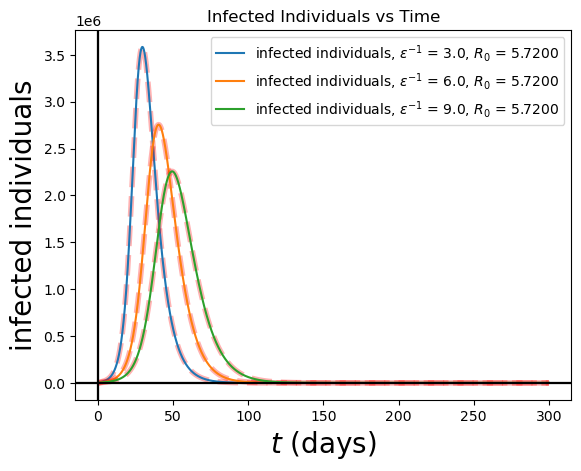

R0 = 0.1
incubation period = 3.0
beta = 0.013104598445374625
max infected 11096.767249817129
day of max infected 4.77047704770477
$R_0$ at max infected 0.1


R0 = 0.1
incubation period = 6.0
beta = 0.013105896016017443
max infected 8399.574055052975
day of max infected 6.990699069906991
$R_0$ at max infected 0.1


R0 = 0.1
incubation period = 9.0
beta = 0.013107193586660262
max infected 6875.892441608579
day of max infected 8.58085808580858
$R_0$ at max infected 0.1




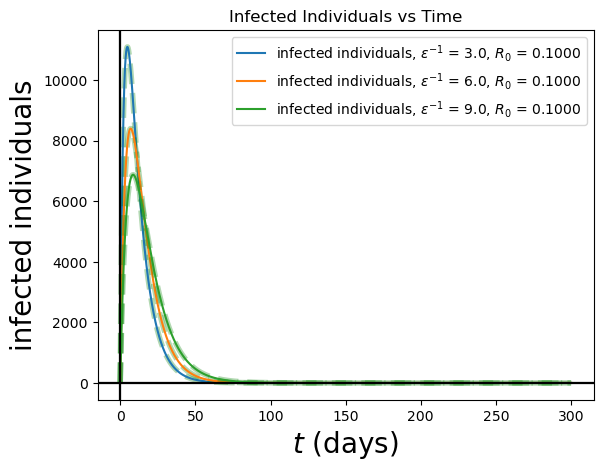

In [389]:
N_0 = 1e7 # initial population
ALPHA = 0.006 # 1/day virus induced death rate
BETA = 0.75 # 1/day Probability of disease transmission per contact (dimensionless) times the number of contacts per unit time
GAMMA = 0.125 # 1/day Recovery rate of infectious individuals (the reciprocal is the infectious period)
EPSILON = 1/3. # 1/day Rate of progression from exposed to infectious (the reciprocal is the incubation period)
MU = 1/(83.*365.) # 1/day, Per-capita natural death rate, we multiplied by 365 to get go from 1/year to 1/day

E_0 = 20000 # initial exposed
I_0 = 1 # initial infected
R_0 = 0 # initial recovered
S_0 = N_0 - E_0 - I_0 # initial susceptible

def f(r,BETA):
    xs=r[0]
    xe=r[1]
    xi=r[2]
    xr=r[3] 
    xn=xs+xe+xi+xr
    fs= - BETA * xs * xi / xn - MU * xs + MU * xn
    fe=   BETA * xs * xi / xn - ( MU + EPSILON ) * xe
    fi=   EPSILON * xe - ( GAMMA + MU + ALPHA ) * xi
    fr=   GAMMA * xi - MU*xr
    return np.array([fs,fe,fi,fr],float)

R0S = [5.72, 0.1]
EPSILONS = [1/3., 1/6., 1/9.]

for R0 in R0S:
    for EPSILON in EPSILONS:
        N_0 = 1e7 # initial population
        BETA = R0*((MU+EPSILON)*(GAMMA+MU+ALPHA))/EPSILON # 1/day Probability of disease transmission per contact (dimensionless) times the number of contacts per unit time, beta changing to satisfy R0
        ALPHA = 0.006 # 1/day virus induced death rate
        GAMMA = 0.125 # 1/day Recovery rate of infectious individuals (the reciprocal is the infectious period)
        EPSILON = EPSILON # 1/day Rate of progression from exposed to infectious (the reciprocal is the incubation period)
        MU = 1/(83.*365.) # 1/day, Per-capita natural death rate, we multiplied by 365 to get go from 1/year to 1/day

        E_0 = 20000 # initial exposed
        I_0 = 1 # initial infected
        R_0 = 0 # initial recovered
        S_0 = N_0 - E_0 - I_0 # initial susceptible
        nstep = 10000
        days = 300
        t = np.linspace(0,days,nstep)
        dt = t[1]-t[0]

        xs=np.zeros(nstep)
        xe=np.zeros(nstep)
        xi=np.zeros(nstep)
        xr=np.zeros(nstep)

        xfs =np.zeros(nstep)
        xfe =np.zeros(nstep)
        xfi =np.zeros(nstep)
        xfr =np.zeros(nstep)

        r = np.array([S_0,E_0,I_0,R_0],float)


        for i in range(nstep):
                xs[i]=r[0]
                xe[i]=r[1]
                xi[i]=r[2]
                xr[i]=r[3]
                k1=dt*f(r,BETA)
                k2=dt*f(r+0.5*k1,BETA)    
                r+=k2

                xf=f(r,BETA)
                xfs[i]=xf[0]
                xfe[i]=xf[1]
                xfi[i]=xf[2]
                xfr[i]=xf[3]


        max_infected = np.max(xi)
        max_infected_day_idx = np.argmax(xi)
        max_infected_day = t[max_infected_day_idx]
        print("R0 = " + str(R0))
        print("incubation period = " + str(np.reciprocal(EPSILON)))
        print("beta = " + str(BETA))
        print("max infected", max_infected)
        print("day of max infected", max_infected_day)
        print("$R_0$ at max infected", R0)
        print("\n")

        R0 = np.ones(nstep)*(BETA*EPSILON)/((MU+EPSILON)*(GAMMA+MU+ALPHA))
        plt.plot(t[R0>1],xi[R0>1],color="red",alpha = 0.3, linestyle = "dashed", linewidth=4)
        plt.plot(t[R0<1],xi[R0<1],color="green",alpha = 0.3,linestyle = "dashed", linewidth=4)
        R0 = (BETA*EPSILON)/((MU+EPSILON)*(GAMMA+MU+ALPHA))
        plt.plot(t,xi,label=f'infected individuals, $\epsilon^{{-1}}$ = {np.reciprocal(EPSILON)}, $R_0$ = {R0:.4f}')

        # plot infected individuals vs t where xR0<1
        plt.axhline(0, color='black')
        plt.axvline(0, color='black')
        plt.legend(loc="best")
        plt.xlabel(r'$t$ (days)',fontsize=20)
        plt.ylabel(r'infected individuals',fontsize=20)
        plt.title("Infected Individuals vs Time")
    plt.show()



Here, the peaks of models where $R_0>1$ and where $R_0<1$ follow similar models as to those earlier. However, when the incubation period increases, the maximums decrease for both.

Additionally, for both, as the incubation increases, so does the time it takes for the number of infected people to reach the maximum. These changes based on different epsilon values are more pronounced for $R_0>1$ than for $R_0<1$. For example, when $R_0<1$, the maximums are reached within one week of each other for the different incubation periods, whereas the maximums are reached in at least over a week if not more for the different incubation periods when $R_0>1$.

## Part 6: Test of the model: changing the infectious period

Chose as initial condition E(0) = 20k.
* Plot the number of infected individuals vs time for an infectious period $\gamma^{-1}$ that varies
from 4 to 12 days and $R_0 > 1$. What happens to the peak of the infected individuals?

* Plot the number of infected individuals vs time for an infectious period $\gamma^{-1}$ that varies
from 4 to 12 days and $R_0 < 1$. What happens to the peak of the infected individuals?

R0 = 5.72
infectious period = 4.0 days
beta = 1.4646538348384257
max infected 2778889.201107461
day of max infected 20.432043204320433
$R_0$ at max infected 5.72


R0 = 5.720000000000001
infectious period = 8.0 days
beta = 0.7495830310754286
max infected 3584488.580757165
day of max infected 29.582958295829584
$R_0$ at max infected 5.720000000000001


R0 = 5.720000000000001
infectious period = 12.0 days
beta = 0.5112260964877627
max infected 3991321.6549998177
day of max infected 37.23372337233723
$R_0$ at max infected 5.720000000000001




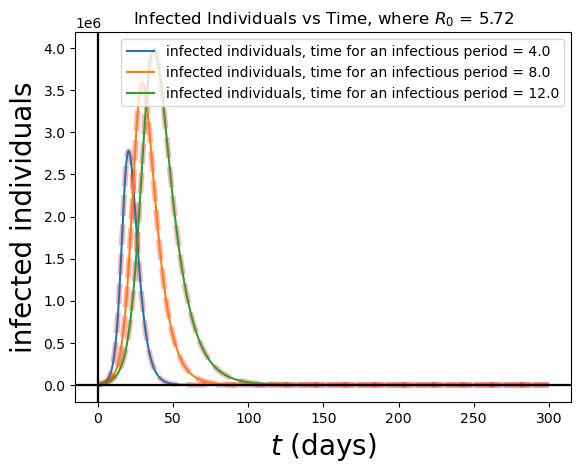

R0 = 0.1
infectious period = 4.0 days
beta = 0.02560583627339905
max infected 8489.771879616304
day of max infected 3.5403540354035403
$R_0$ at max infected 0.1


R0 = 0.09999999999999999
infectious period = 8.0 days
beta = 0.013104598445374621
max infected 11096.767249817129
day of max infected 4.77047704770477
$R_0$ at max infected 0.09999999999999999


R0 = 0.09999999999999998
infectious period = 12.0 days
beta = 0.008937519169366479
max infected 12527.595070779389
day of max infected 5.5805580558055805
$R_0$ at max infected 0.09999999999999998




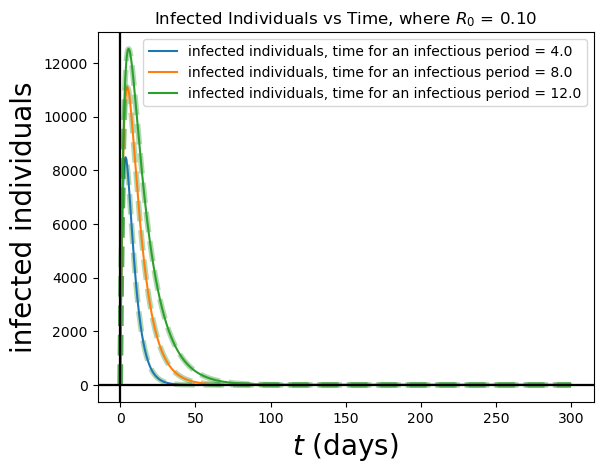

In [390]:
N_0 = 1e7 # initial population
ALPHA = 0.006 # 1/day virus induced death rate
BETA = 0.75 # 1/day Probability of disease transmission per contact (dimensionless) times the number of contacts per unit time
GAMMA = 0.125 # 1/day Recovery rate of infectious individuals (the reciprocal is the infectious period)
EPSILON = 1/3. # 1/day Rate of progression from exposed to infectious (the reciprocal is the incubation period)
MU = 1/(83.*365.) # 1/day, Per-capita natural death rate, we multiplied by 365 to get go from 1/year to 1/day

E_0 = 20000 # initial exposed
I_0 = 1 # initial infected
R_0 = 0 # initial recovered
S_0 = N_0 - E_0 - I_0 # initial susceptible

def f(r,BETA):
    xs=r[0]
    xe=r[1]
    xi=r[2]
    xr=r[3] 
    xn=xs+xe+xi+xr
    fs= - BETA * xs * xi / xn - MU * xs + MU * xn
    fe=   BETA * xs * xi / xn - ( MU + EPSILON ) * xe
    fi=   EPSILON * xe - ( GAMMA + MU + ALPHA ) * xi
    fr=   GAMMA * xi - MU*xr
    return np.array([fs,fe,fi,fr],float)
# BETAs = [0.75,0.013104598445374625] # 0.013104598445374625 is the beta that gives R0 = 0.1, bc BETA = R0*((MU+EPSILON)*(GAMMA+MU+ALPHA))/EPSILON
ROs = [5.72,0.1]
GAMMAs = [1/4., 1/8., 1/12.]

for R0 in ROs:
    for GAMMA in GAMMAs:
        N_0 = 1e7 # initial population
        ALPHA = 0.006 # 1/day virus induced death rate
        GAMMA = GAMMA # 1/day Recovery rate of infectious individuals (the reciprocal is the infectious period)
        EPSILON = 1/3 # 1/day Rate of progression from exposed to infectious (the reciprocal is the incubation period)
        MU = 1/(83.*365.) # 1/day, Per-capita natural death rate, we multiplied by 365 to get go from 1/year to 1/day

        E_0 = 20000 # initial exposed
        I_0 = 1 # initial infected
        R_0 = 0 # initial recovered
        S_0 = N_0 - E_0 - I_0 # initial susceptible
        BETA = R0*((MU+EPSILON)*(GAMMA+MU+ALPHA))/EPSILON
        #R0 = (BETA*EPSILON)/((MU+EPSILON)*(GAMMA+MU+ALPHA))
        nstep = 10000
        days = 300
        t = np.linspace(0,days,nstep)
        dt = t[1]-t[0]

        xs=np.zeros(nstep)
        xe=np.zeros(nstep)
        xi=np.zeros(nstep)
        xr=np.zeros(nstep)
        xR0 = np.zeros(nstep)

        xfs =np.zeros(nstep)
        xfe =np.zeros(nstep)
        xfi =np.zeros(nstep)
        xfr =np.zeros(nstep)


        r = np.array([S_0,E_0,I_0,R_0],float)


        for i in range(nstep):
                xs[i]=r[0]
                xe[i]=r[1]
                xi[i]=r[2]
                xr[i]=r[3]
                k1=dt*f(r,BETA)
                k2=dt*f(r+0.5*k1,BETA)    
                r+=k2

                xf=f(r,BETA)
                xfs[i]=xf[0]
                xfe[i]=xf[1]
                xfi[i]=xf[2]
                xfr[i]=xf[3]


        
        max_infected = np.max(xi)
        max_infected_day_idx = np.argmax(xi)
        max_infected_day = t[max_infected_day_idx]
        print("R0 = " + str(R0))

        print(f"infectious period = {np.reciprocal(GAMMA)} days")
        print("beta = " + str(BETA))
        print("max infected", max_infected)
        print("day of max infected", max_infected_day)
        print("$R_0$ at max infected", R0)
        print("\n")
        R0 = np.ones(nstep)*(BETA*EPSILON)/((MU+EPSILON)*(GAMMA+MU+ALPHA))
        plt.plot(t[R0>1],xi[R0>1],color="red",alpha = 0.3, linestyle = "dashed", linewidth=4)
        plt.plot(t[R0<1],xi[R0<1],color="green",alpha = 0.3,linestyle = "dashed", linewidth=4)
        R0 = (BETA*EPSILON)/((MU+EPSILON)*(GAMMA+MU+ALPHA))
        plt.plot(t,xi,label=f'infected individuals, time for an infectious period = {np.reciprocal(GAMMA)}')
        # R0 = np.ones(nstep)*(BETA*EPSILON)/((MU+EPSILON)*(GAMMA+MU+ALPHA))
        # R0 = (BETA*EPSILON)/((MU+EPSILON)*(GAMMA+MU+ALPHA))
        # plot infected individuals vs t where xR0<1
        plt.axhline(0, color='black')
        plt.axvline(0, color='black')
        plt.legend(loc="best")
        plt.xlabel(r'$t$ (days)',fontsize=20)
        plt.ylabel(r'infected individuals',fontsize=20)
        plt.title("Infected Individuals vs Time, where $R_0$ = "+ f'{R0:.2f}')
    plt.show()




## Part 7. Modeling a lock-down

Start off with the parameters given in Part 1. Modify your code to account for isolation measures. For example, assume that on day 22 R0 changes from the initial value of 5.72 to 0.1

* Plot S, E, I, R vs time.

* Plot the number of total deaths vs time, and the number of deaths per day vs time. Where is the peak located with respect to the results you obtained in Part 2.? What is the maximum number of dead individuals per day in this case? How does it compare with the results of Part 2.?

* Assume that the isolation measures are placed 2 to 4 days before the 22nd day. How do
your results change?

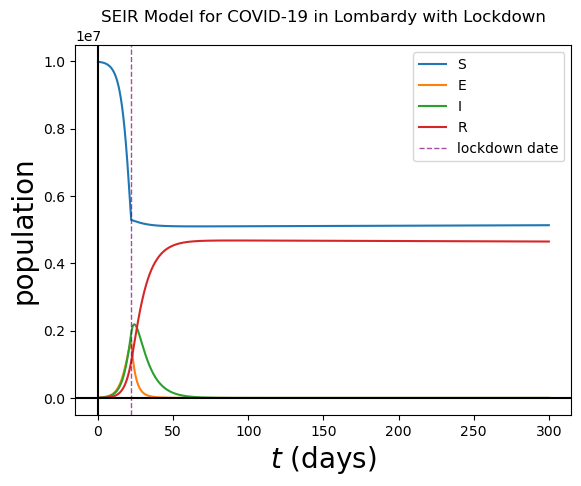

beta = 0.013104598445374625
max infected 2185467.911167771
day of max infected 24.18241824182418
$R_0$ at max infected 0.1




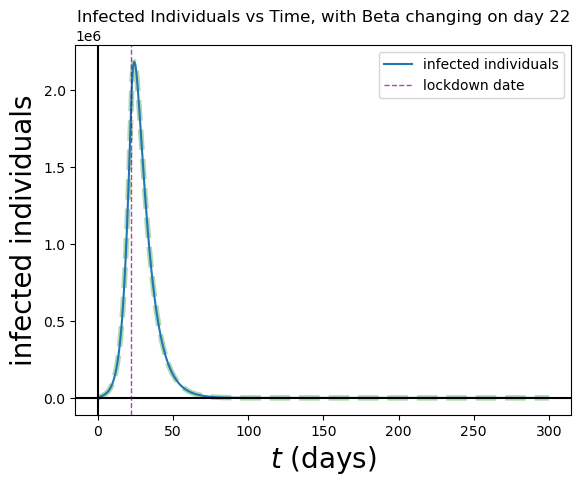

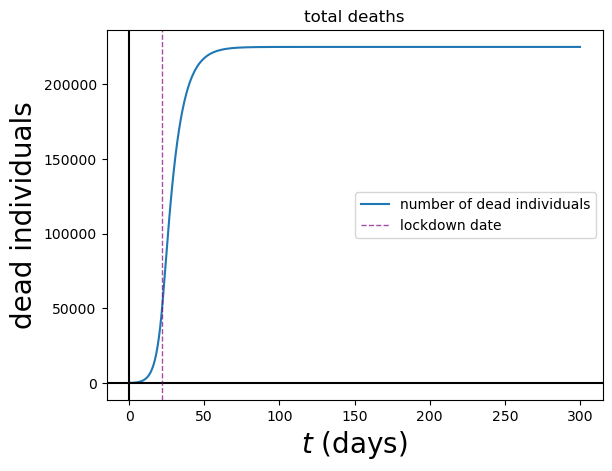

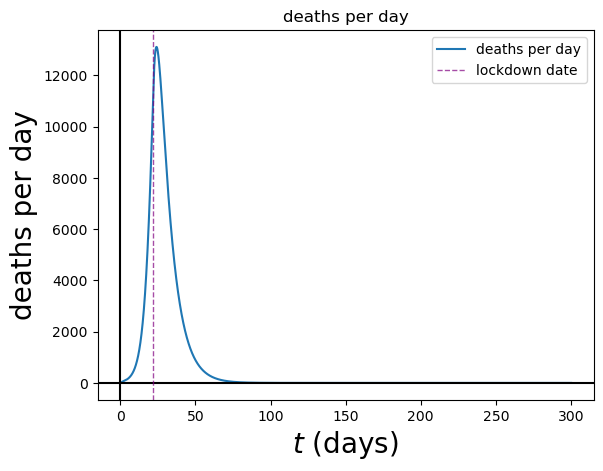

maximum deaths per day 13112.80746700667
total_deaths 224971.2201218251


In [391]:
N_0 = 1e7 # initial population
ALPHA = 0.006 # 1/day virus induced death rate
GAMMA = 0.125 # 1/day Recovery rate of infectious individuals (the reciprocal is the infectious period)
EPSILON = 1/3. # 1/day Rate of progression from exposed to infectious (the reciprocal is the incubation period)
MU = 1/(83.*365.) # 1/day, Per-capita natural death rate, we multiplied by 365 to get go from 1/year to 1/day

E_0 = 20000 # initial exposed
I_0 = 1 # initial infected
R_0 = 0 # initial recovered
S_0 = N_0 - E_0 - I_0 # initial susceptible

def f(r,BETA):
    xs=r[0]
    xe=r[1]
    xi=r[2]
    xr=r[3] 
    xn=xs+xe+xi+xr
    fs= - BETA * xs * xi / xn - MU * xs + MU * xn
    fe=   BETA * xs * xi / xn - ( MU + EPSILON ) * xe
    fi=   EPSILON * xe - ( GAMMA + MU + ALPHA ) * xi
    fr=   GAMMA * xi - MU*xr
    return np.array([fs,fe,fi,fr],float)

N_0 = 1e7 # initial population
ALPHA = 0.006 # 1/day virus induced death rate
GAMMA = 0.125 # 1/day Recovery rate of infectious individuals (the reciprocal is the infectious period)
EPSILON = 1/3. # 1/day Rate of progression from exposed to infectious (the reciprocal is the incubation period)
MU = 1/(83.*365.) # 1/day, Per-capita natural death rate, we multiplied by 365 to get go from 1/year to 1/day

E_0 = 20000 # initial exposed
I_0 = 1 # initial infected
R_0 = 0 # initial recovered
S_0 = N_0 - E_0 - I_0 # initial susceptible
nstep = 10000
days = 300
t = np.linspace(0,days,nstep)
dt = t[1]-t[0]

xs=np.zeros(nstep)
xe=np.zeros(nstep)
xi=np.zeros(nstep)
xr=np.zeros(nstep)

xfs =np.zeros(nstep)
xfe =np.zeros(nstep)
xfi =np.zeros(nstep)
xfr =np.zeros(nstep)


r = np.array([S_0,E_0,I_0,R_0],float)


for i in range(nstep):
        R0 = np.where(t[i]<22,5.72,0.1)
        BETA = R0*((MU+EPSILON)*(GAMMA+MU+ALPHA))/EPSILON
        xs[i]=r[0]
        xe[i]=r[1]
        xi[i]=r[2]
        xr[i]=r[3]
        k1=dt*f(r,BETA)
        k2=dt*f(r+0.5*k1,BETA)    
        r+=k2

        xf=f(r,BETA)
        xfs[i]=xf[0]
        xfe[i]=xf[1]
        xfi[i]=xf[2]
        xfr[i]=xf[3]

xdn = N_0  - ( xs + xe + xi + xr )
xd = -(xfs + xfe + xfi + xfr)

plt.plot(t,xs,label="S")
plt.plot(t,xe,label="E")
plt.plot(t,xi,label="I")
plt.plot(t,xr,label="R")
plt.axvline(22, color='purple', alpha = 0.7, linestyle='dashed', linewidth=1,label="lockdown date")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend(loc="best")
plt.xlabel(r'$t$ (days)',fontsize=20)
plt.ylabel(r'population',fontsize=20)
plt.title("SEIR Model for COVID-19 in Lombardy with Lockdown")
plt.show()

max_infected = np.max(xi)
max_infected_day_idx = np.argmax(xi)
max_infected_day = t[max_infected_day_idx]
print("beta = " + str(BETA))
print("max infected", max_infected)
print("day of max infected", max_infected_day)
print("$R_0$ at max infected", R0)
print("\n")
R0 = np.ones(nstep)*(BETA*EPSILON)/((MU+EPSILON)*(GAMMA+MU+ALPHA))
plt.plot(t[np.logical_and(R0>1,R0<5.73)],xi[np.logical_and(R0>1,R0<5.73)],color="red",alpha = 0.3, linestyle = "dashed", linewidth=4)
plt.plot(t[R0<1],xi[R0<1],color="green",alpha = 0.3, linestyle = "dashed", linewidth=4)
plt.plot(t,xi,label="infected individuals")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.axvline(22, color='purple', alpha = 0.7, linestyle='dashed', linewidth=1,label="lockdown date")
plt.legend(loc="best")
plt.xlabel(r'$t$ (days)',fontsize=20)
plt.ylabel(r'infected individuals',fontsize=20)
plt.title("Infected Individuals vs Time, with Beta changing on day 22")
plt.show()

plt.plot(t,xdn,label="number of dead individuals")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.axvline(22, color='purple', alpha = 0.7, linestyle='dashed', linewidth=1,label="lockdown date")
plt.legend(loc="best")
plt.xlabel(r'$t$ (days)',fontsize=20)
plt.ylabel(r'dead individuals',fontsize=20)
plt.title("total deaths")
plt.show()

plt.plot(t, xd, label="deaths per day")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.axvline(22, color='purple', alpha = 0.7, linestyle='dashed', linewidth=1,label="lockdown date")
plt.legend(loc="best")
plt.xlabel(r'$t$ (days)',fontsize=20)
plt.ylabel(r'deaths per day',fontsize=20)
plt.title("deaths per day")
plt.show()

print("maximum deaths per day", np.max(xd))
print("total_deaths", np.max(xdn))

Here, we can see that we were able to slow the spread by enacting a lockdown on day 22. As a result, the number of infected individuals reached a much lower maximum, by over 1 million individuals. Additionally, the maximum was reached sooner. This helped to bring the curve down faster as less people were getting infected by others.

It is easy to assume that if the lockdown is put in place a few days earlier, that the maximum would be even lower, and the maximum would be reached even sooner. This is because $\beta$ decreases so $R_0$ decreases as well, so the virus begins infecting less people sooner and so the rate of new cases drops sooner.

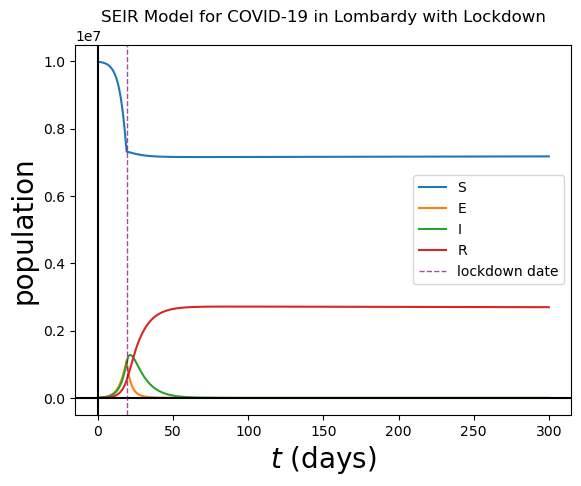

beta = 0.013104598445374625
max infected 1276265.1136276913
day of max infected 21.512151215121513
$R_0$ at max infected 0.1




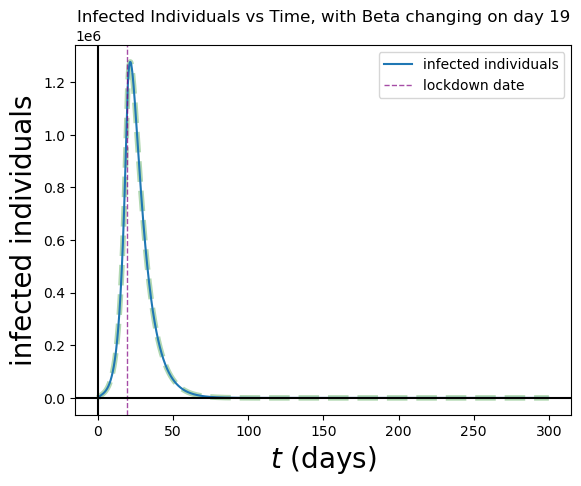

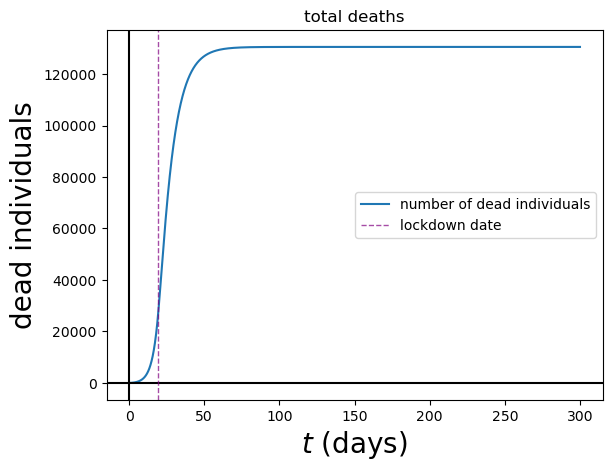

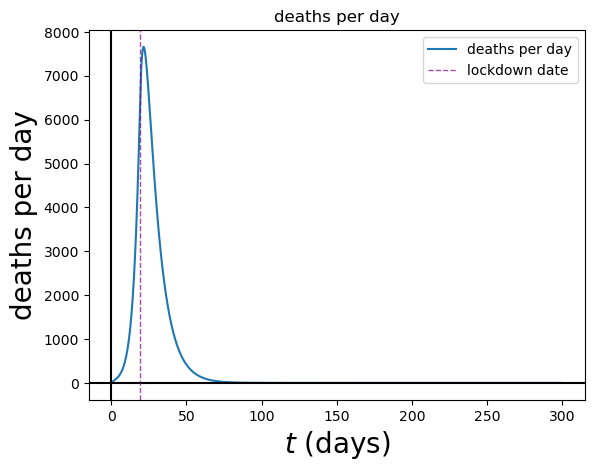

maximum deaths per day 7657.590681766131
total deaths 130538.37213810906


In [392]:
N_0 = 1e7 # initial population
ALPHA = 0.006 # 1/day virus induced death rate
GAMMA = 0.125 # 1/day Recovery rate of infectious individuals (the reciprocal is the infectious period)
EPSILON = 1/3. # 1/day Rate of progression from exposed to infectious (the reciprocal is the incubation period)
MU = 1/(83.*365.) # 1/day, Per-capita natural death rate, we multiplied by 365 to get go from 1/year to 1/day

E_0 = 20000 # initial exposed
I_0 = 1 # initial infected
R_0 = 0 # initial recovered
S_0 = N_0 - E_0 - I_0 # initial susceptible

def f(r,BETA):
    xs=r[0]
    xe=r[1]
    xi=r[2]
    xr=r[3] 
    xn=xs+xe+xi+xr
    fs= - BETA * xs * xi / xn - MU * xs + MU * xn
    fe=   BETA * xs * xi / xn - ( MU + EPSILON ) * xe
    fi=   EPSILON * xe - ( GAMMA + MU + ALPHA ) * xi
    fr=   GAMMA * xi - MU*xr
    return np.array([fs,fe,fi,fr],float)

BETAs = [0.75, 0.013104598445374625] # 0.75 gets us R0 = 5.72, and 0.013104598445374625 is the beta that gives R0 = 0.1, bc BETA = R0*((MU+EPSILON)*(GAMMA+MU+ALPHA))/EPSILON


N_0 = 1e7 # initial population
ALPHA = 0.006 # 1/day virus induced death rate
GAMMA = 0.125 # 1/day Recovery rate of infectious individuals (the reciprocal is the infectious period)
EPSILON = 1/3. # 1/day Rate of progression from exposed to infectious (the reciprocal is the incubation period)
MU = 1/(83.*365.) # 1/day, Per-capita natural death rate, we multiplied by 365 to get go from 1/year to 1/day

E_0 = 20000 # initial exposed
I_0 = 1 # initial infected
R_0 = 0 # initial recovered
S_0 = N_0 - E_0 - I_0 # initial susceptible
R0 = (BETA*EPSILON)/((MU+EPSILON)*(GAMMA+MU+ALPHA))
nstep = 10000
days = 300
t = np.linspace(0,days,nstep)
dt = t[1]-t[0]

xs=np.zeros(nstep)
xe=np.zeros(nstep)
xi=np.zeros(nstep)
xr=np.zeros(nstep)

xfs =np.zeros(nstep)
xfe =np.zeros(nstep)
xfi =np.zeros(nstep)
xfr =np.zeros(nstep)


r = np.array([S_0,E_0,I_0,R_0],float)


for i in range(nstep):
        R0 = np.where(t[i]<19,5.72,0.1)
        BETA = R0*((MU+EPSILON)*(GAMMA+MU+ALPHA))/EPSILON
        xs[i]=r[0]
        xe[i]=r[1]
        xi[i]=r[2]
        xr[i]=r[3]
        k1=dt*f(r,BETA)
        k2=dt*f(r+0.5*k1,BETA)    
        r+=k2

        xf=f(r,BETA)
        xfs[i]=xf[0]
        xfe[i]=xf[1]
        xfi[i]=xf[2]
        xfr[i]=xf[3]

xdn = N_0  - ( xs + xe + xi + xr )
xd = -(xfs + xfe + xfi + xfr)

plt.plot(t,xs,label="S")
plt.plot(t,xe,label="E")
plt.plot(t,xi,label="I")
plt.plot(t,xr,label="R")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.axvline(19, color='purple', alpha = 0.7, linestyle='dashed', linewidth=1,label="lockdown date")
plt.legend(loc="best")
plt.xlabel(r'$t$ (days)',fontsize=20)
plt.ylabel(r'population',fontsize=20)
plt.title("SEIR Model for COVID-19 in Lombardy with Lockdown")
plt.show()

max_infected = np.max(xi)
max_infected_day_idx = np.argmax(xi)
max_infected_day = t[max_infected_day_idx]
print("beta = " + str(BETA))
print("max infected", max_infected)
print("day of max infected", max_infected_day)
print("$R_0$ at max infected", R0)
print("\n")
R0 = np.ones(nstep)*(BETA*EPSILON)/((MU+EPSILON)*(GAMMA+MU+ALPHA))
plt.plot(t[np.logical_and(R0>1,R0<5.73)],xi[np.logical_and(R0>1,R0<5.73)],color="red",alpha = 0.3, linestyle = "dashed", linewidth=4)
plt.plot(t[R0<1],xi[R0<1],color="green",alpha = 0.3, linestyle = "dashed", linewidth=4)
plt.plot(t,xi,label="infected individuals")
plt.axvline(19, color='purple', alpha = 0.7, linestyle='dashed', linewidth=1,label="lockdown date")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend(loc="best")
plt.xlabel(r'$t$ (days)',fontsize=20)
plt.ylabel(r'infected individuals',fontsize=20)
plt.title("Infected Individuals vs Time, with Beta changing on day 19")
plt.show()

plt.plot(t,xdn,label="number of dead individuals")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.axvline(19, color='purple', alpha = 0.7, linestyle='dashed', linewidth=1,label="lockdown date")
plt.legend(loc="best")
plt.xlabel(r'$t$ (days)',fontsize=20)
plt.ylabel(r'dead individuals',fontsize=20)
plt.title("total deaths")
plt.show()

plt.plot(t, xd, label="deaths per day")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.axvline(19, color='purple', alpha = 0.7, linestyle='dashed', linewidth=1,label="lockdown date")
plt.legend(loc="best")
plt.xlabel(r'$t$ (days)',fontsize=20)
plt.ylabel(r'deaths per day',fontsize=20)
plt.title("deaths per day")
plt.show()

print("maximum deaths per day", np.max(xd))
print("total deaths", np.max(xdn))



## Part 8. Comparing to real data
The SEIR model has been used in Carcione et al. to analyze the Covid-19 endemic in May 2020. The authors determined the parameters entering the SEIR model by fitting the data available at that time. The parameters are reported in Table 1 of that reference. For the last part of your project, use the values reported in the raw labeled “1.1”. Note that β1 is the value of β from day 1 to day 22, β2 is the value of β from day 23 to day 35, and β3 is the value of β from day 35 on. Additionally, the initial number of infected individuals is I(0) = 1000. Modify your code to accommodate for the new parameters. Load the data
dataLombardia.csv. The first column represents the days (February 24 being day 1.) The second and third columns represent the total number of deaths and the number of dead individuals per day, respectively.

* Compare your numerical evaluation for both the total number of death individuals and
the number of deaths individuals per day with the data. Comment on your results.

In [393]:
# load data from dataLombardia.csv

data = np.loadtxt("dataLombardia.csv",delimiter=",",skiprows=1)
days = data[:,0]
total_deaths = data[:,1]
deaths_per_day = data[:,2]


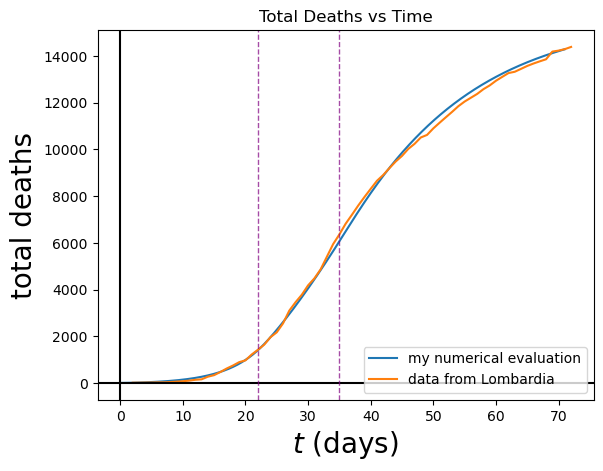

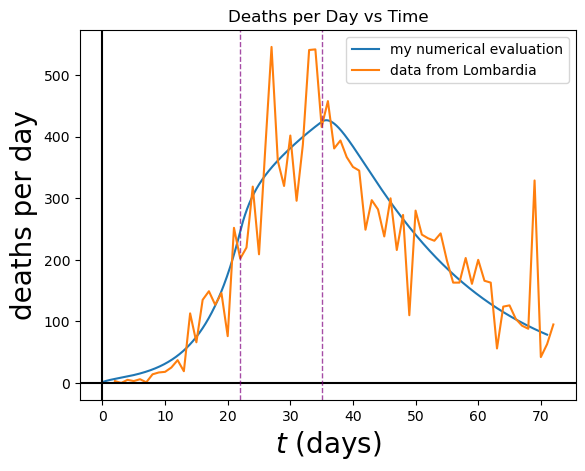

Text(0.5, 1.0, 'SEIR Model for COVID-19 in Lombardy with Lockdown')

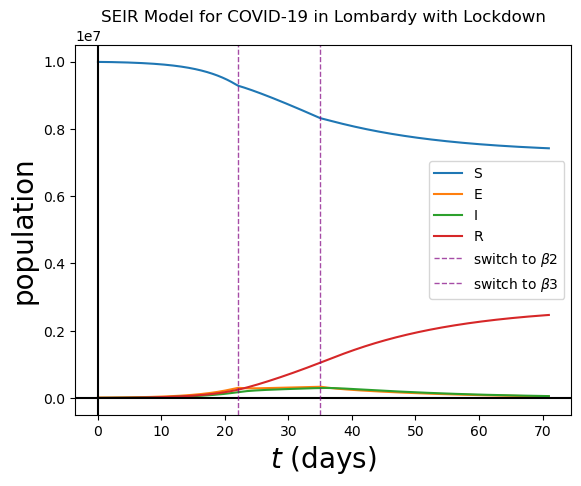

In [394]:
# numerical solution


ALPHA = 0.00144
BETA1 = 0.75
BETA2 = 0.34
BETA3 = 0.2
GAMMA = 1/4.02
MU = 1/(83.*365.)
EPSILON = 1/4.25

N_0 = 1e7 # initial population

E_0 = 11460 # initial exposed
I_0 = 1000 # initial infected
R_0 = 0 # initial recovered

S_0 = N_0 - E_0 - I_0 # initial susceptible

def f(r,BETA):
    xs=r[0]
    xe=r[1]
    xi=r[2]
    xr=r[3] 
    xn=xs+xe+xi+xr
    fs= - BETA * xs * xi / xn - MU * xs + MU * xn
    fe=   BETA * xs * xi / xn - ( MU + EPSILON ) * xe
    fi=   EPSILON * xe - ( GAMMA + MU + ALPHA ) * xi
    fr=   GAMMA * xi - MU*xr
    return np.array([fs,fe,fi,fr],float)

nstep = 100000
t = np.linspace(0,len(days),nstep)
dt = t[1]-t[0]

xs=np.zeros(nstep)
xe=np.zeros(nstep)
xi=np.zeros(nstep)
xr=np.zeros(nstep)

xfs =np.zeros(nstep)
xfe =np.zeros(nstep)
xfi =np.zeros(nstep)
xfr =np.zeros(nstep)

r = np.array([S_0,E_0,I_0,R_0],float)

for i in range(nstep):
        BETA = np.where(t[i]<22,BETA1,np.where(t[i]<35,BETA2,BETA3))
        xs[i]=r[0]
        xe[i]=r[1]
        xi[i]=r[2]
        xr[i]=r[3]
        k1=dt*f(r,BETA)
        k2=dt*f(r+0.5*k1,BETA)    
        r+=k2

        xf=f(r,BETA)
        xfs[i]=xf[0]
        xfe[i]=xf[1]
        xfi[i]=xf[2]
        xfr[i]=xf[3]

xdn = N_0  - ( xs + xe + xi + xr )
xd = - ( xfs + xfe + xfi + xfr )
#compare my numerical evaluation for both the total number of deaths and the number of deaths per day with the data from Lombardia



# plt.plot(t, xdn,label="number of dead individuals")
# plt.axhline(0, color='black')
# plt.axvline(0, color='black')
# plt.legend(loc="best")
# plt.xlabel(r'$t$ (days)',fontsize=20) 
# plt.ylabel(r'dead individuals',fontsize=20)
# plt.title("total deaths")
# plt.show()
# plt.plot(t, xd,label="deaths per day")
# plt.axhline(0, color='black')
# plt.axvline(0, color='black')
# plt.legend(loc="best")
# plt.xlabel(r'$t$ (days)',fontsize=20) 
# plt.ylabel(r'deaths per day',fontsize=20)
# plt.title("deaths per day")
# plt.show()

# day_with_max_deaths_idx = np.argmax(xd)
# day_with_max_deaths = t[day_with_max_deaths_idx]
# max_deaths = np.max(xd)
# print("max deaths per day", max_deaths)
# print("day of max deaths per day", np.floor(day_with_max_deaths))






# total deaths
plt.plot(t,xdn,label="my numerical evaluation")
plt.plot(days,total_deaths,label="data from Lombardia")
plt.legend(loc="best")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.axvline(22, color='purple', alpha = 0.7, linestyle='dashed', linewidth=1,label=r"switch to $\beta 2$")
plt.axvline(35, color='purple', alpha = 0.7, linestyle='dashed', linewidth=1,label=r"switch to $\beta 3$")
plt.xlabel(r'$t$ (days)',fontsize=20)
plt.ylabel(r'total deaths',fontsize=20)
plt.title("Total Deaths vs Time")
plt.show()


# deaths per day
plt.plot(t,xd,label="my numerical evaluation")
plt.plot(days,deaths_per_day,label="data from Lombardia")
plt.legend(loc="best")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.axvline(22, color='purple', alpha = 0.7, linestyle='dashed', linewidth=1,label=r"switch to $\beta 2$")
plt.axvline(35, color='purple', alpha = 0.7, linestyle='dashed', linewidth=1,label=r"switch to $\beta 3$")
plt.xlabel(r'$t$ (days)',fontsize=20)
plt.ylabel(r'deaths per day',fontsize=20)
plt.title("Deaths per Day vs Time")
plt.show()



#plot infection

plt.plot(t,xs,label="S")
plt.plot(t,xe,label="E")
plt.plot(t,xi,label="I")
plt.plot(t,xr,label="R")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.axvline(22, color='purple', alpha = 0.7, linestyle='dashed', linewidth=1,label=r"switch to $\beta 2$")
plt.axvline(35, color='purple', alpha = 0.7, linestyle='dashed', linewidth=1,label=r"switch to $\beta 3$")
plt.legend(loc="best")
plt.xlabel(r'$t$ (days)',fontsize=20)
plt.ylabel(r'population',fontsize=20)
plt.title("SEIR Model for COVID-19 in Lombardy with Lockdown")



